In [1]:
%matplotlib inline

import pandas as pd
import missingno as mns

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

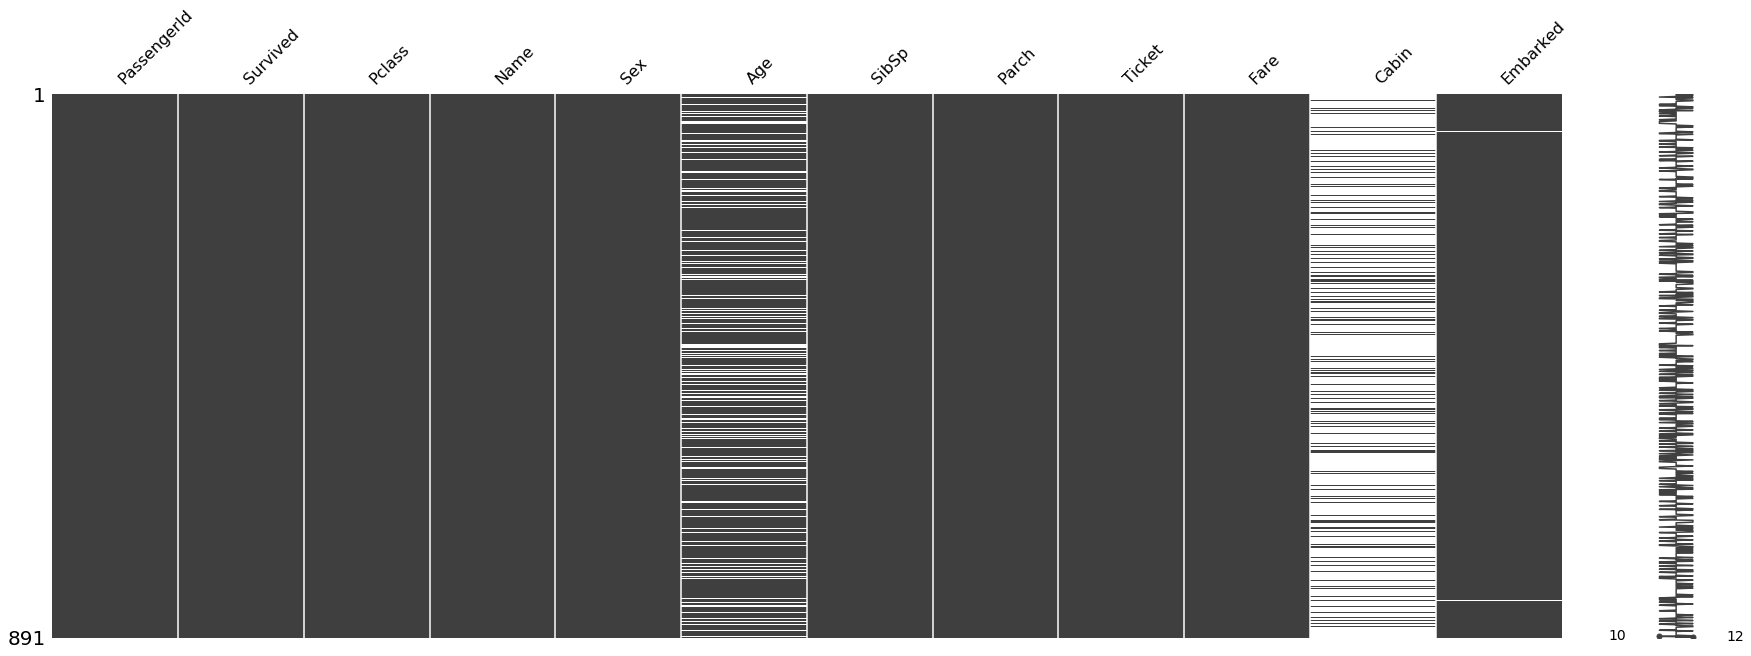

In [6]:
mns.matrix(train, figsize = (30, 10))

In [7]:
sns.set_style('whitegrid')
sns.set_palette('rainbow')

In [8]:
train.drop('Name', inplace = True, axis = 1)
train.drop('Cabin', inplace = True, axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [9]:
train.drop('Ticket', inplace = True, axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


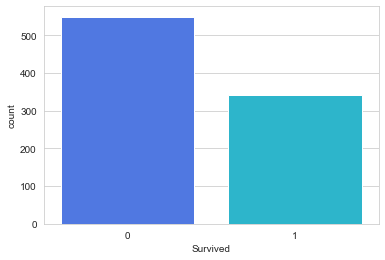

In [10]:
sns.countplot(x = 'Survived', data = train)

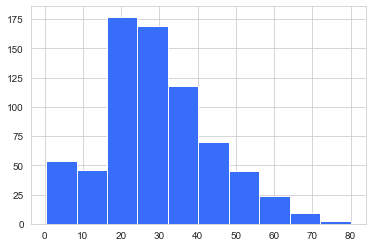

In [11]:
train.Age.hist()

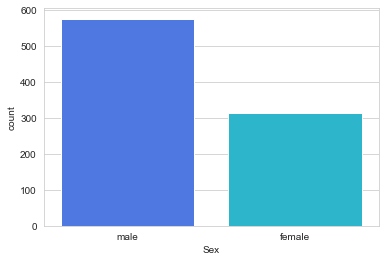

In [12]:
sns.countplot(x = 'Sex', data = train)

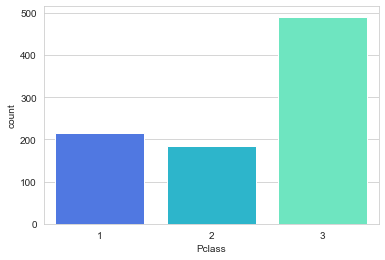

In [13]:
sns.countplot(x = 'Pclass', data = train)

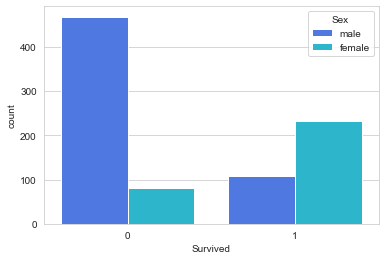

In [14]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

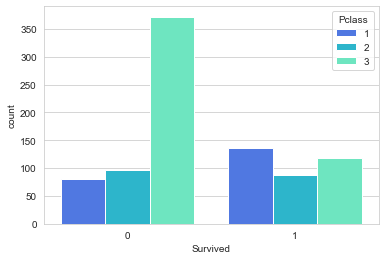

In [15]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

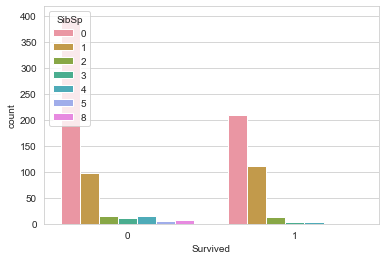

In [16]:
sns.countplot(x = 'Survived', hue = 'SibSp', data = train)

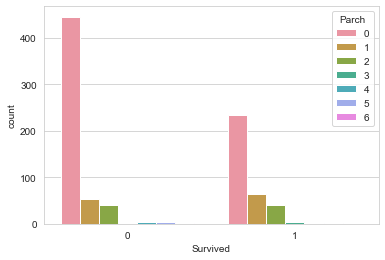

In [17]:
sns.countplot(x = 'Survived', hue = 'Parch', data = train)

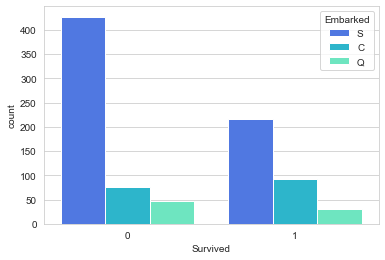

In [18]:
sns.countplot(x = 'Survived', hue = 'Embarked', data = train)

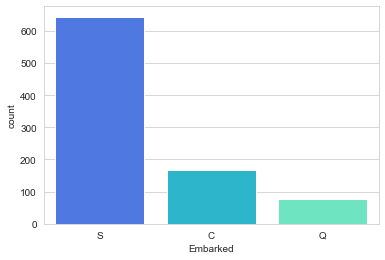

In [19]:
sns.countplot(x = 'Embarked', data = train)

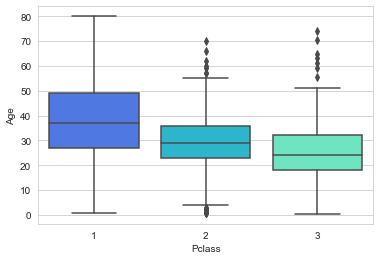

In [20]:
# Exploring the relationship between Age and Pclass
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [21]:
# Pclass 1 = 37, Pclass 2 = 28, Pclass 3 = 25
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [22]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [23]:
train.shape

(891, 9)

In [24]:
train.dropna(inplace = True)

In [25]:
train.shape

(889, 9)

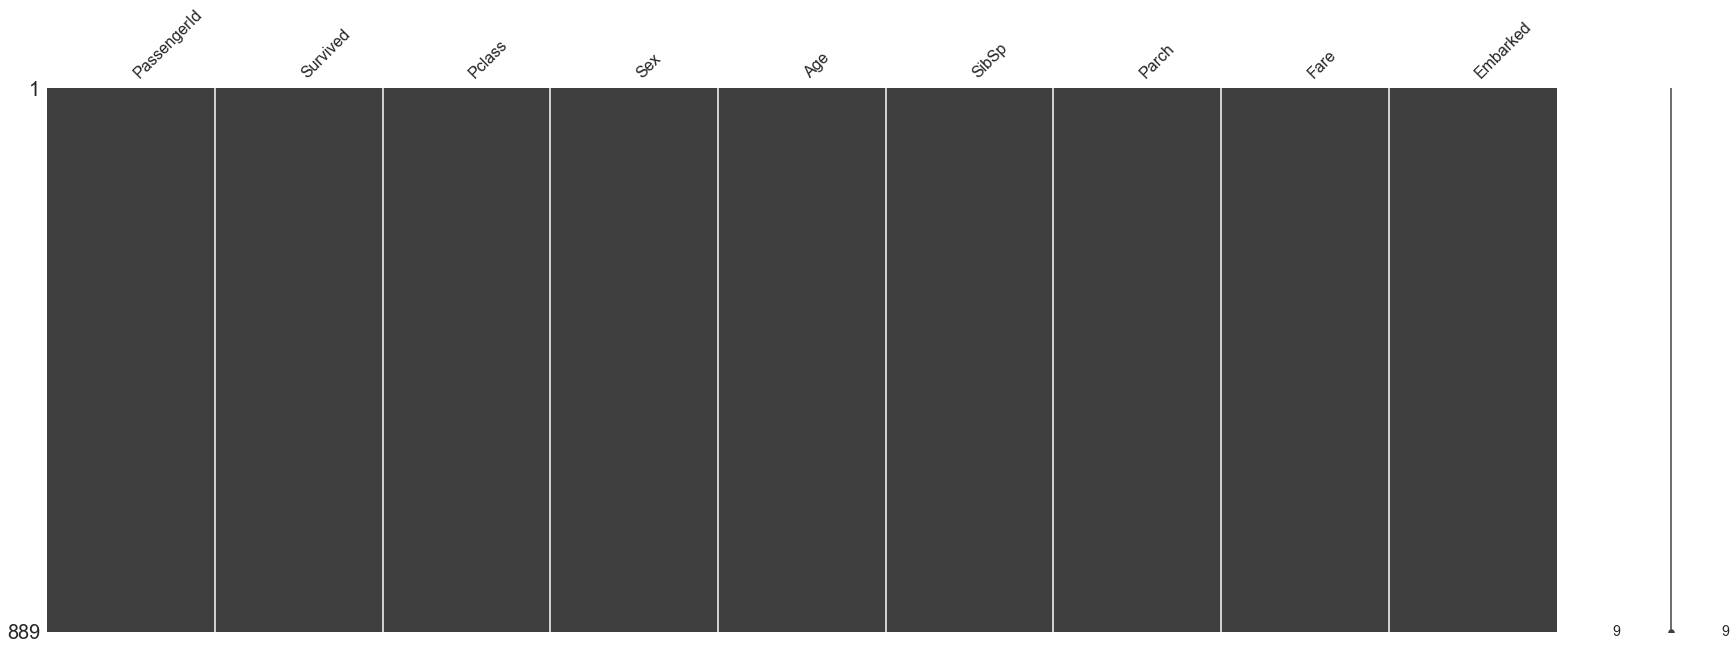

In [26]:
mns.matrix(train, figsize = (30, 10))

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [28]:
train.drop('PassengerId', axis = 1, inplace = True)

In [29]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
pcl = pd.get_dummies(train['Pclass'], prefix = 'Pclass')
pcl.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [31]:
sex = pd.get_dummies(train['Sex'], prefix = 'Sex')
sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [32]:
embark = pd.get_dummies(train['Embarked'], prefix = 'Embark')
embark.head()

,Embark_C,Embark_Q,Embark_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [33]:
train = pd.concat([train, pcl, sex, embark], axis = 1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embark_C,Embark_Q,Embark_S
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1


In [34]:
train.drop(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], axis = 1, inplace = True)
train.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embark_C,Embark_Q,Embark_S
0,0,22.0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,0,0,1


In [35]:
train.to_csv('train_encoded_final.csv', index = False)

In [36]:
X = train.drop('Survived', axis = 1)
X.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embark_C,Embark_Q,Embark_S
0,22.0,7.2500,0,0,1,0,1,0,0,1
1,38.0,71.2833,1,0,0,1,0,1,0,0
2,26.0,7.9250,0,0,1,1,0,0,0,1
3,35.0,53.1000,1,0,0,1,0,0,0,1
4,35.0,8.0500,0,0,1,0,1,0,0,1


In [37]:
Y = train['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split as tts

In [39]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.2, random_state = 1)

In [40]:
X_train.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embark_C,Embark_Q,Embark_S
121,25.0,8.0500,0,0,1,0,1,0,0,1
687,19.0,10.1708,0,0,1,0,1,0,0,1
790,25.0,7.7500,0,0,1,0,1,0,1,0
837,25.0,8.0500,0,0,1,0,1,0,0,1
659,58.0,113.2750,1,0,0,0,1,1,0,0


In [41]:
X_test.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embark_C,Embark_Q,Embark_S
387,36.0,13.0000,0,1,0,1,0,0,0,1
259,50.0,26.0000,0,1,0,1,0,0,0,1
771,48.0,7.8542,0,0,1,0,1,0,0,1
208,16.0,7.7500,0,0,1,1,0,0,1,0
683,14.0,46.9000,0,0,1,0,1,0,0,1


In [42]:
Y_train.head()

121    0
687    0
790    0
837    0
659    0
Name: Survived, dtype: int64

In [43]:
Y_test.head()

387    1
259    1
771    0
208    1
683    0
Name: Survived, dtype: int64

In [44]:
X_train.shape

(711, 10)

In [45]:
Y_train.shape

(711,)

In [46]:
X_test.shape

(178, 10)

In [47]:
Y_test.shape

(178,)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logmodel = LogisticRegression(max_iter = 900)
logmodel.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=900,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
predictions = logmodel.predict(X_test)
predictions

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
print(accuracy_score(Y_test, predictions) * 100)

80.89887640449437


In [53]:
# Test a Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)
pred = GBC.predict(X_test)
print(accuracy_score(Y_test, pred) * 100)

84.26966292134831


In [54]:
# Looks like GBC gave more accuracy..

In [55]:
pred

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [56]:
X.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embark_C,Embark_Q,Embark_S
0,22.0,7.2500,0,0,1,0,1,0,0,1
1,38.0,71.2833,1,0,0,1,0,1,0,0
2,26.0,7.9250,0,0,1,1,0,0,0,1
3,35.0,53.1000,1,0,0,1,0,0,0,1
4,35.0,8.0500,0,0,1,0,1,0,0,1


In [57]:
X.shape

(889, 10)

In [58]:
pred = GBC.predict([[22.0, 7.2500, 0, 0, 1, 0, 1, 0, 0, 1]])
pred

array([0], dtype=int64)

In [59]:
X_train.columns

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embark_C', 'Embark_Q', 'Embark_S'],
      dtype='object')

In [60]:
X_train.shape

(711, 10)

In [61]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [63]:
pcl = pd.get_dummies(test['Pclass'], prefix = 'Pclass')
pcl.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [64]:
sex = pd.get_dummies(test['Sex'], prefix = 'Sex')
sex.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [65]:
embark = pd.get_dummies(test['Embarked'], prefix = 'Embark')
embark.head()

,Embark_C,Embark_Q,Embark_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [66]:
test = pd.concat([test, pcl, sex, embark], axis = 1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embark_C,Embark_Q,Embark_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [67]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis = 1)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Sex_female       0
Sex_male         0
Embark_C         0
Embark_Q         0
Embark_S         0
dtype: int64

In [68]:
test['Fare'].fillna((test['Fare'].mean()), inplace = True)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Sex_female       0
Sex_male         0
Embark_C         0
Embark_Q         0
Embark_S         0
dtype: int64

In [69]:
test_columns = X_train.columns
test[test_columns].head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embark_C,Embark_Q,Embark_S
0,34.5,7.8292,0,0,1,0,1,0,1,0
1,47.0,7.0000,0,0,1,1,0,0,0,1
2,62.0,9.6875,0,1,0,0,1,0,1,0
3,27.0,8.6625,0,0,1,0,1,0,0,1
4,22.0,12.2875,0,0,1,1,0,0,0,1


In [70]:
preds = GBC.predict(test[test_columns])
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [71]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = preds
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [72]:
len(submission)

418

In [73]:
len(test)

418

In [74]:
submission.to_csv('GBC_submission.csv', index = False)

In [75]:
sub = pd.read_csv('GBC_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
